<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/01_DataScienceUsingPython/blob/main/07_TimeSeriesAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis of time series

In this file, we will extract information from a time series. We will use matplotlib and seaborn packages to visualize our data. Also, we will show how to decompose and normalize our time series, and also correlate our variables.

We will also learn how to differ a **tendency**, a **seasonality**, and a **noise**. We will show how to normalize noise and to minimize it by the use of moving averages. 

# Analyzing sales

First, we will import Pandas package and use it to read our first file, denominated as "alucar.csv". This data set has information about how many sales were performed in each month

In [1]:
import pandas as pd

In [2]:
alucar_dataset = pd.read_csv('alucar.csv')

alucar_dataset.head(5)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


Let's get some information about this data.

In [3]:
alucar_dataset.shape

(24, 2)

We have 24 entries in our data, and two columns. Since we have an entry for each month, we have 2 years worth of data!

In [4]:
alucar_dataset.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


We have no null data. Good!

Also, not that column 'mes' is of type 'object', which means that it is a string. However, since we want to work with time series, we want 'mes' to be of type 'datatime'. To change, this, we can do:

In [5]:
alucar_dataset['mes'] = pd.to_datetime(alucar_dataset['mes'])
alucar_dataset.head(5)

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [6]:
alucar_dataset.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

Now, let's draw some graphs. To that end, we will use the seaborn and the matplotlib packages.

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

Are our sales increasing? Well, we can make a *lineplot( )* to see this.

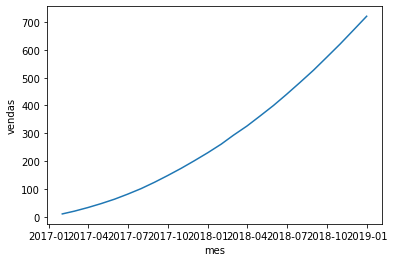

In [8]:
sns.lineplot(x = 'mes', y = 'vendas', data = alucar_dataset)

Indeed, our sales are increasing! And at a very good rate. 

Let's try to improve visualization of our graph by changing some of its properties. To help in deciding the style of our figure, we can use style guides:

https://urbaninstitute.github.io/graphics-styleguide/



Text(0, 0.5, 'Sales (USD)')

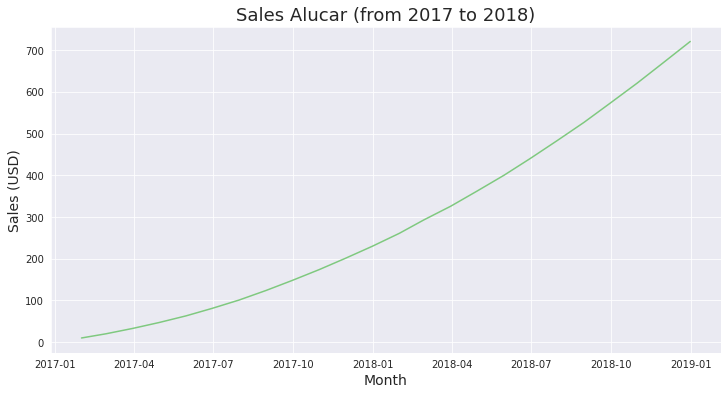

In [9]:
sns.set_palette('Accent')                  # This changes the color palette
sns.set_style('darkgrid')                  # This changes the style for seaborn

line_sales = sns.lineplot(x = 'mes', y = 'vendas', data = alucar_dataset)

line_sales.figure.set_size_inches(12,6)                                   # This changes the figure size
line_sales.set_title('Sales Alucar (from 2017 to 2018)', fontsize = 18)   # This adds a title to our graph
line_sales.set_xlabel('Month', fontsize = 14)                             # This changes the x label
line_sales.set_ylabel('Sales (USD)', fontsize = 14)                       # This changes the y label

# Decomposing our sales time series

Decomposing a time series is very important to allow us to **extract** more information. 

Let's talk a little bit more about our dataset. Usually, using time series, one may want to study the rate of increase (or decrease). For that end, we can use:

In [10]:
alucar_dataset['vendas'].shift(-1)/alucar_dataset['vendas'] - 1

0     1.000000
1     0.650000
2     0.424242
3     0.340426
4     0.285714
5     0.246914
6     0.227723
7     0.193548
8     0.175676
9     0.155172
10    0.144279
11    0.134783
12    0.122605
13    0.112628
14    0.110429
15    0.104972
16    0.100000
17    0.097727
18    0.091097
19    0.087287
20    0.083770
21    0.078905
22    0.076119
23         NaN
Name: vendas, dtype: float64

Alternatively, we may simply use the function *pct_change( )*

In [11]:
alucar_dataset['percent_change'] = alucar_dataset['vendas'].pct_change( )

alucar_dataset.head( )

,mes,vendas,percent_change
0,2017-01-31,10,NaN
1,2017-02-28,20,1.000000
2,2017-03-31,33,0.650000
3,2017-04-30,47,0.424242
4,2017-05-31,63,0.340426


Now, let's look at a new graph:

Text(0, 0.5, 'Pct. inc. (USD)')

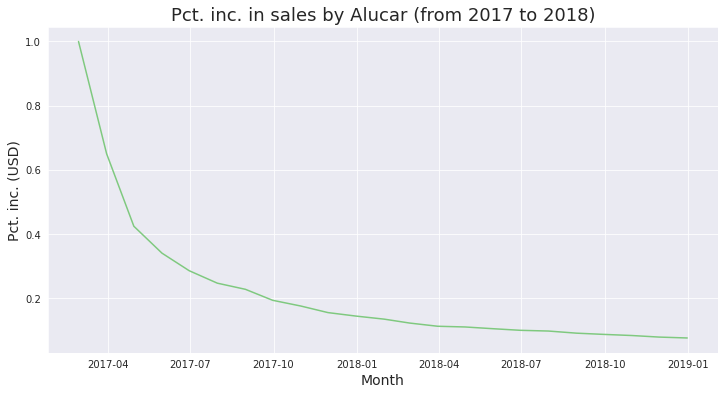

In [12]:
sns.set_palette('Accent')                  # This changes the color palette
sns.set_style('darkgrid')                  # This changes the style for seaborn

line_sales_pct = sns.lineplot(x = 'mes', y = 'percent_change', data = alucar_dataset)

line_sales_pct.figure.set_size_inches(12,6)                                                  # This changes the figure size
line_sales_pct.set_title('Pct. inc. in sales by Alucar (from 2017 to 2018)', fontsize = 18)  # This adds a title to our graph
line_sales_pct.set_xlabel('Month', fontsize = 14)                                            # This changes the x label
line_sales_pct.set_ylabel('Pct. inc. (USD)', fontsize = 14)                                  # This changes the y label

So, as time passes, alucar is selling more. However, the sales growth rate is decreasing as time passes.

A very similar thing can be done with just the change in sales, not the percentual change:

In [13]:
alucar_dataset['change'] = alucar_dataset['vendas'].diff( )

Again, let's make a new graph for this:

Text(0, 0.5, 'Increase (USD)')

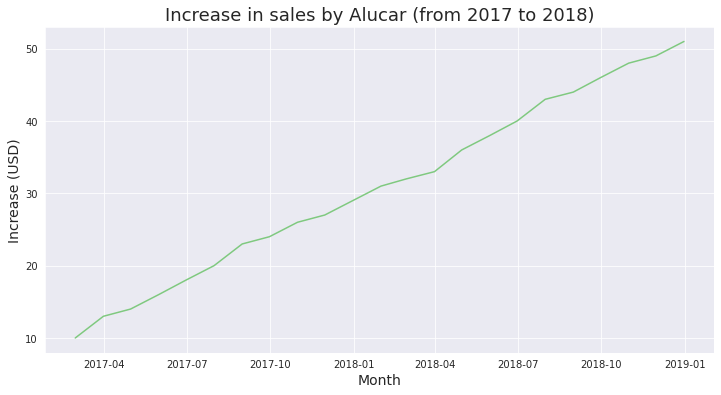

In [14]:
sns.set_palette('Accent')                  # This changes the color palette
sns.set_style('darkgrid')                  # This changes the style for seaborn

line_sales_inc = sns.lineplot(x = 'mes', y = 'change', data = alucar_dataset)

line_sales_inc.figure.set_size_inches(12,6)                                                  # This changes the figure size
line_sales_inc.set_title('Increase in sales by Alucar (from 2017 to 2018)', fontsize = 18)   # This adds a title to our graph
line_sales_inc.set_xlabel('Month', fontsize = 14)                                            # This changes the x label
line_sales_inc.set_ylabel('Increase (USD)', fontsize = 14)                                   # This changes the y label

We see that the absolute increase in sales varies almost linearly!

Note that, to draw our formatted figures, we had to copy all of our lines of code. It would be more effective to simply define a function to set all figure properties at once.

In [15]:
def SetFigAccDarkGridLinePlot(xval, yval, dataset, title, xlabel, ylabel):

  sns.set_palette('Accent')                  # This changes the color palette
  sns.set_style('darkgrid')                  # This changes the style for seaborn

  figlineplot = sns.lineplot(x = xval, y = yval, data = dataset)

  figlineplot.figure.set_size_inches(12,6)       # This changes the figure size
  figlineplot.set_title(title, fontsize = 18)    # This adds a title to our graph
  figlineplot.set_xlabel(xlabel, fontsize = 14)  # This changes the x label
  figlineplot.set_ylabel(ylabel, fontsize = 14)  # This changes the y label

  return figlineplot

Now, let's draw our last figure one more time, using this new function

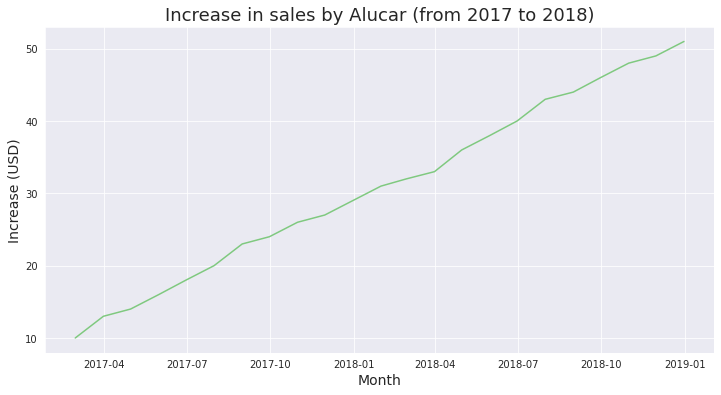

In [16]:
title = 'Increase in sales by Alucar (from 2017 to 2018)'
xlabel = 'Month'
ylabel = 'Increase (USD)'

line_sales_inc = SetFigAccDarkGridLinePlot('mes', 'change', alucar_dataset, title, xlabel, ylabel)

Now let's use our new function to draw a figure for the acceleration, which is the difference to the change in sales increase for subsequent months:

In [17]:
alucar_dataset['acceleration'] = alucar_dataset['change'].diff( )
alucar_dataset.head( )

,mes,vendas,percent_change,change,acceleration
0,2017-01-31,10,NaN,NaN,NaN
1,2017-02-28,20,1.000000,10.0,NaN
2,2017-03-31,33,0.650000,13.0,3.0
3,2017-04-30,47,0.424242,14.0,1.0
4,2017-05-31,63,0.340426,16.0,2.0


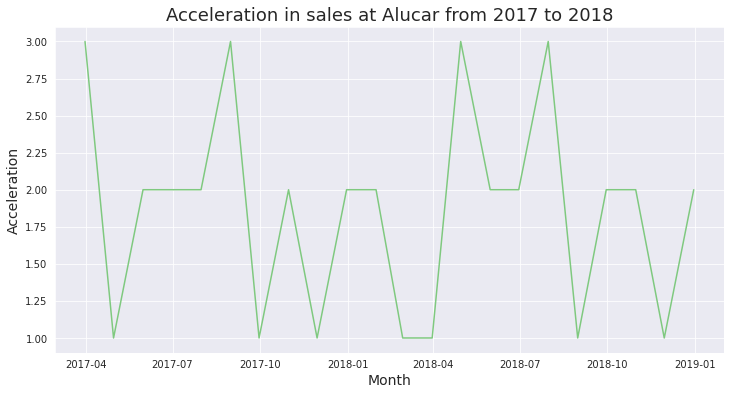

In [18]:
[title, xlabel, ylabel] = ['Acceleration in sales at Alucar from 2017 to 2018', 'Month', 'Acceleration']
linesales_acc = SetFigAccDarkGridLinePlot('mes', 'acceleration', alucar_dataset, title, xlabel, ylabel)

Our acceleration is always between 1 and 3. That means that our accelearation was never negative. This shows that our difference in the number of sales always increased!

## Joining all graphs in the same figure

We made **four** different graphs to describe our sales at alucar. Let's try to join them all in only one figure, to make visualization easier. First, let's define a new function:

In [19]:
def SetFigAccDarkGridLinePlot_ForSubplot(xval, yval, dataset, title, xlabel, ylabel):

  sns.set_palette('Accent')                  # This changes the color palette
  sns.set_style('darkgrid')                  # This changes the style for seaborn

  figlineplot = sns.lineplot(x = xval, y = yval, data = dataset)

  figlineplot.set_title(title, fontsize = 18)    # This adds a title to our graph
  figlineplot.set_xlabel(xlabel, fontsize = 14)  # This changes the x label
  figlineplot.set_ylabel(ylabel, fontsize = 14)  # This changes the y label

Now, let's define our new figure:

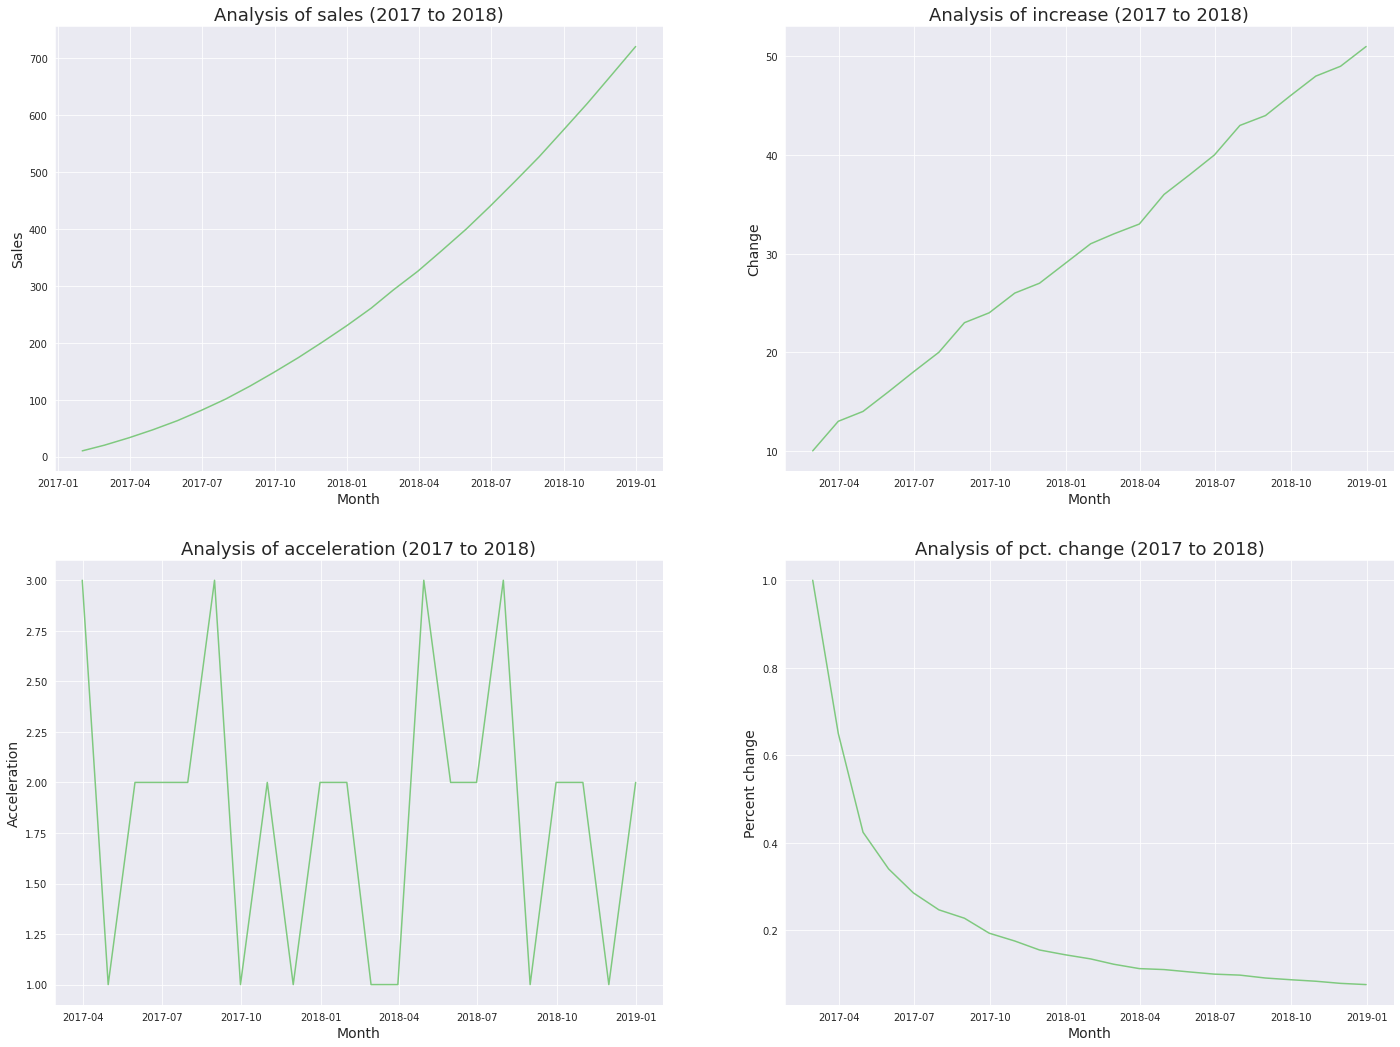

In [20]:
plt.figure(figsize = (24, 18))

ax = plt.subplot(2, 2, 1)
sales_fig = SetFigAccDarkGridLinePlot_ForSubplot('mes', 'vendas', alucar_dataset, 'Analysis of sales (2017 to 2018)', 'Month', 'Sales')

plt.subplot(2, 2, 2)
chng_fig = SetFigAccDarkGridLinePlot_ForSubplot('mes', 'change', alucar_dataset, 'Analysis of increase (2017 to 2018)', 'Month', 'Change')

plt.subplot(2, 2, 3)
acc_fig = SetFigAccDarkGridLinePlot_ForSubplot('mes', 'acceleration', alucar_dataset, 'Analysis of acceleration (2017 to 2018)', 'Month', 'Acceleration')

plt.subplot(2, 2, 4)
pctchng_fig = SetFigAccDarkGridLinePlot_ForSubplot('mes', 'percent_change', alucar_dataset, 'Analysis of pct. change (2017 to 2018)', 'Month', 'Percent change')

Let's make a simple function to allow us to quickly draw multiple figures at once:

In [21]:
def SetFigAccDarkGridLinePlot_Comparison(xval, y, dataset, title):
  nplots = len(y)

  plt.figure(figsize = (16, nplots*4))
  
  for i in range(nplots):
    ax = plt.subplot(nplots, 1, i+1)
    if i == 0:
      ax.set_title(title, fontsize = 18, loc = 'left')
    sns.lineplot(x = xval, y = y[i], data = dataset)

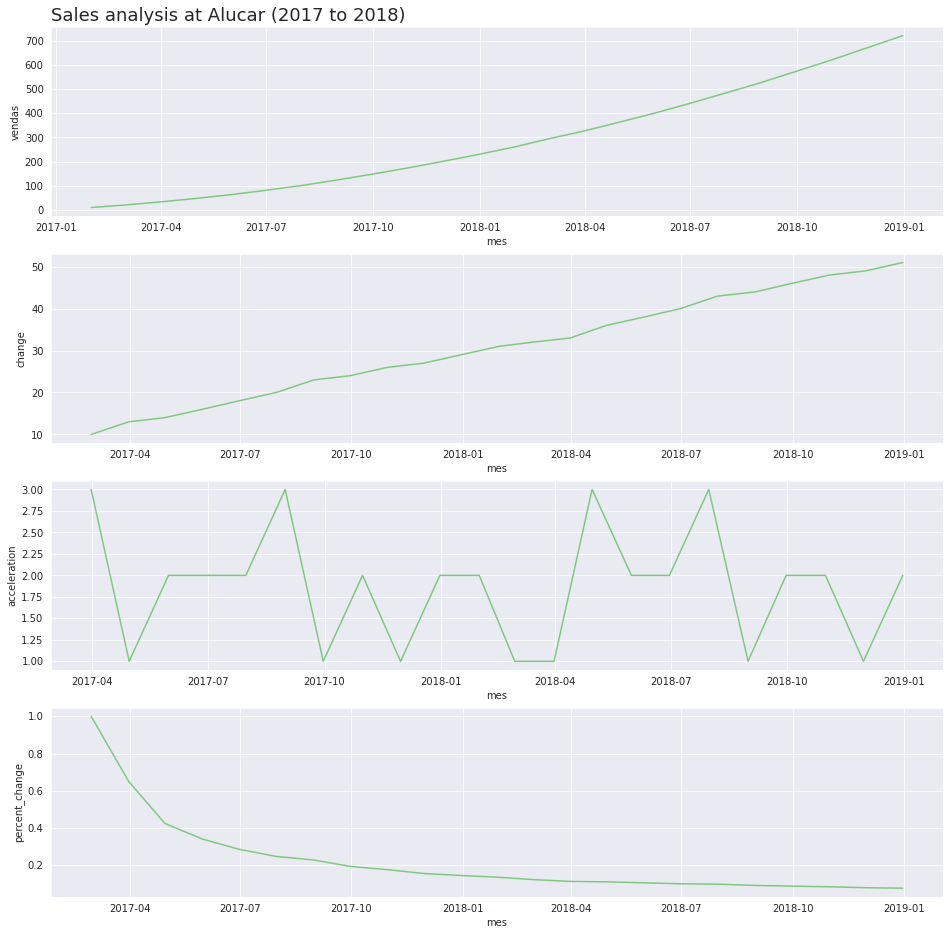

In [22]:
yval = ['vendas', 'change', 'acceleration', 'percent_change']

SetFigAccDarkGridLinePlot_Comparison('mes', yval, alucar_dataset, 'Sales analysis at Alucar (2017 to 2018)')

Good! Now we have a built-in function to allow us to see any number of line graphs in the same figure.

## Autocorrelation

Note that, in this time series, we have a trend: our sales always increase. However, how does the increase in sales in this week are **correlated** to the increase from the last week?

We can understand this looking at the autocorrelation, which is a measure of the correlation between variables in a time series. We basically compare a time series with itself, but with a 'lag': a shift!

https://pt.wikipedia.org/wiki/Autocorrela%C3%A7%C3%A3o

To draw the autocorrelation graph, will need to import an specific library

In [23]:
from pandas.plotting import autocorrelation_plot

Then, we can draw our autocorrelation graph using the *autocorrelation_plot( )* function

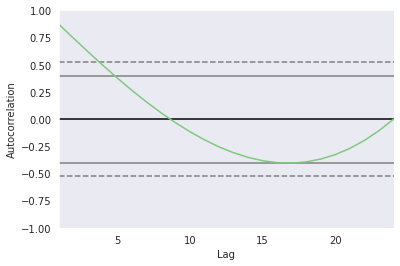

In [24]:
autocorrelation_plot(alucar_dataset['vendas'])

We see that the graph shows the autocorrelation for the variable 'vendas' for different lags. Each shift in the series is a lag. For instance:

*   Lag 1:

In [25]:
alucar_dataset['vendas'].shift(1)

0       NaN
1      10.0
2      20.0
3      33.0
4      47.0
5      63.0
6      81.0
7     101.0
8     124.0
9     148.0
10    174.0
11    201.0
12    230.0
13    261.0
14    293.0
15    326.0
16    362.0
17    400.0
18    440.0
19    483.0
20    527.0
21    573.0
22    621.0
23    670.0
Name: vendas, dtype: float64

*  Lag 2:

In [26]:
alucar_dataset['vendas'].shift(2)

0       NaN
1       NaN
2      10.0
3      20.0
4      33.0
5      47.0
6      63.0
7      81.0
8     101.0
9     124.0
10    148.0
11    174.0
12    201.0
13    230.0
14    261.0
15    293.0
16    326.0
17    362.0
18    400.0
19    440.0
20    483.0
21    527.0
22    573.0
23    621.0
Name: vendas, dtype: float64

Now, returning to our graph:

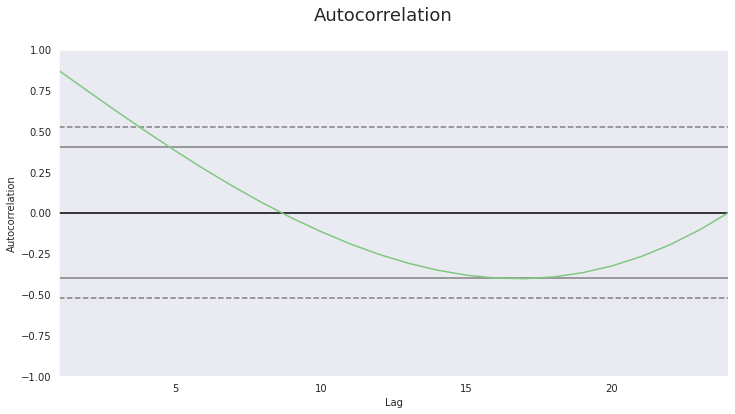

In [27]:
ax = plt.figure(figsize = (12,6))
autocorrelation_plot(alucar_dataset['vendas'])
ax.suptitle('Autocorrelation', fontsize = 18)
ax = ax

We see that we have a very high correlation (close to 1.0) in our first lag (Lag 1). That means that sales from this month are very well correlated with sales from the previous month. Also, it seems that sales from this month are correlated (in a lesser degree) to sales 8 to 9 months forward!

To end this topic, let's also draw the autocorrelation graph for the change in sales and the acceleration in sales.

In [28]:
alucar_dataset.head( )

,mes,vendas,percent_change,change,acceleration
0,2017-01-31,10,NaN,NaN,NaN
1,2017-02-28,20,1.000000,10.0,NaN
2,2017-03-31,33,0.650000,13.0,3.0
3,2017-04-30,47,0.424242,14.0,1.0
4,2017-05-31,63,0.340426,16.0,2.0


Note that these columns do not start at index 0. Thus, we have to draw the autocorrelation plot based on where these columns start (indexes 1 and 2, respectively)

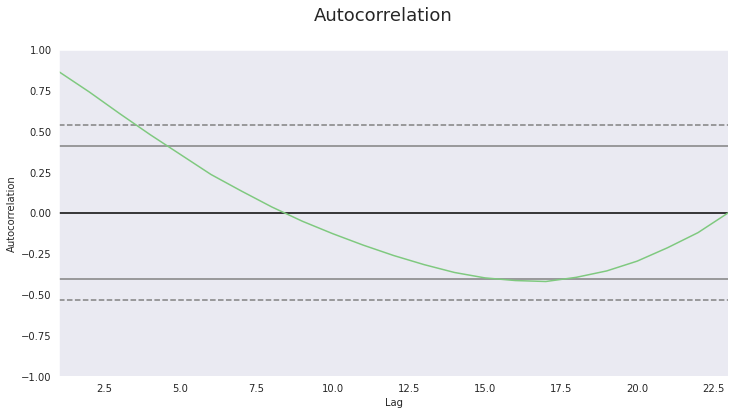

In [29]:
ax = plt.figure(figsize = (12,6))
autocorrelation_plot(alucar_dataset['change'][1:])
ax.suptitle('Autocorrelation', fontsize = 18)
ax = ax

This graph is very similar to the previous one!

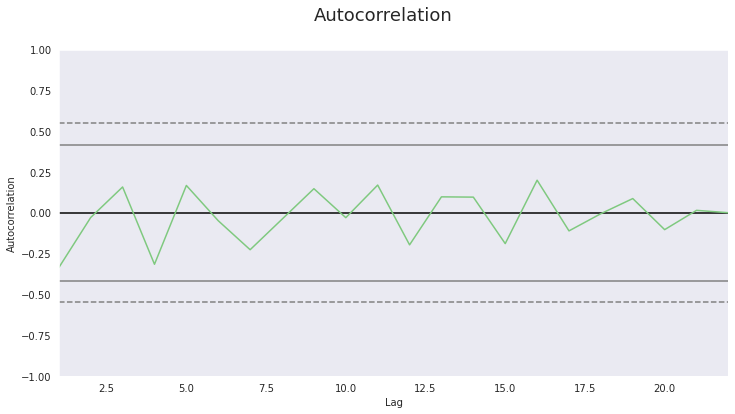

In [30]:
ax = plt.figure(figsize = (12,6))
autocorrelation_plot(alucar_dataset['acceleration'][2:])
ax.suptitle('Autocorrelation', fontsize = 18)
ax = ax

The acceleration, however, seems to be very poorly correlated.

# Importance of decomposition and sazonality

Now, let's make inferences on a new dataset, this time related to the number of subscribers of the Alucar newsletter.

In [31]:
subscriber_df = pd.read_csv('newsletter_alucar.csv')

In [32]:
subscriber_df.head( )

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


Let's start by making our initial analyses on the number of entries, type of each entry, existence of null values...

In [33]:
subscriber_df.shape

(24, 2)

In [34]:
subscriber_df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   mes         24 non-null     object
 1   assinantes  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


Again, we have 24 entries, and no null values. However, once again, our 'mes' column is of type 'object'. 

Let's fix this:

In [35]:
subscriber_df.mes = pd.to_datetime(subscriber_df.mes)

In [36]:
subscriber_df.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

Great! Now we can start our analyses.

First, let's create new columns, related to the change in the number of subscribers, and to the acceleration.

In [37]:
subscriber_df['change'] = subscriber_df.assinantes.diff( )

subscriber_df['acc'] = subscriber_df.change.diff( )

subscriber_df.head( )

,mes,assinantes,change,acc
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


Great! Now let's use our previous function to draw a graph for all of these at once.

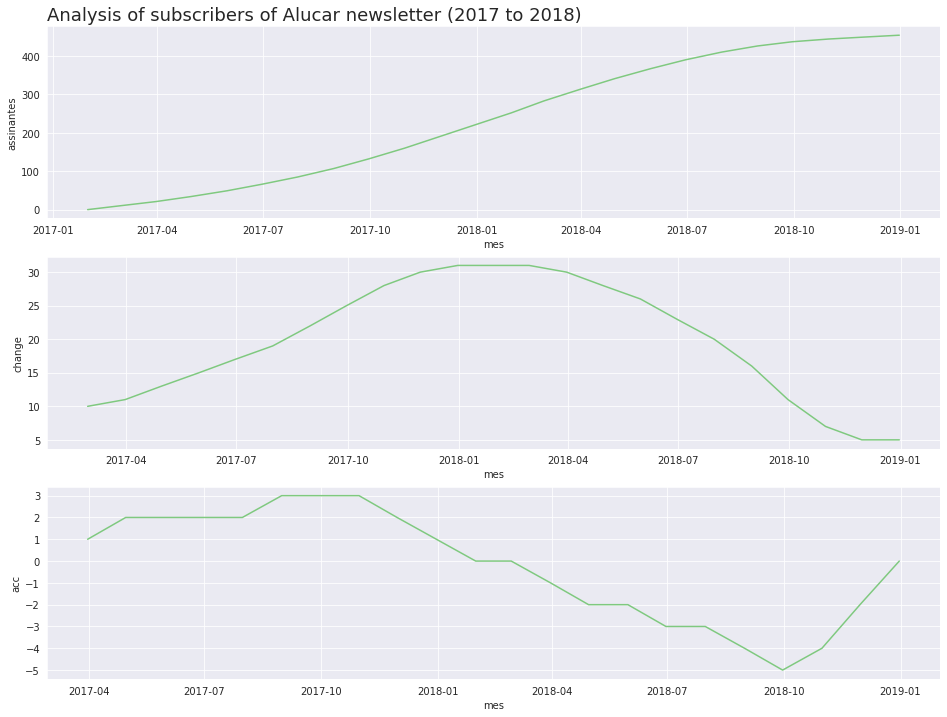

In [38]:
SetFigAccDarkGridLinePlot_Comparison('mes', ['assinantes', 'change', 'acc'], subscriber_df, 'Analysis of subscribers of Alucar newsletter (2017 to 2018)')

Our graphs look very interesting. First, it seems that our subscribers always increase, as the change is always positive. Thus, the number of subscribers tend to increase. However, the rate of increase is gradually decreasing, as we can see by the negative acceleration at some points.

The graph for the number of subscribers looks a lot like a sigmoid function.

Now, let's look to another dataset, now related to chocolate sales from a company.

In [39]:
choc_sales_df = pd.read_csv('chocolura.csv')

choc_sales_df.head( )

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


As always, making our initial analyses

In [40]:
choc_sales_df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [41]:
choc_sales_df.mes = pd.to_datetime(choc_sales_df.mes)

choc_sales_df.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

Now, creating our new columns:

In [42]:
choc_sales_df['change'] = choc_sales_df['vendas'].diff( )

choc_sales_df['acc'] = choc_sales_df['change'].diff( )

choc_sales_df.head( )

,mes,vendas,change,acc
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


And, finally, plotting our comparisons:

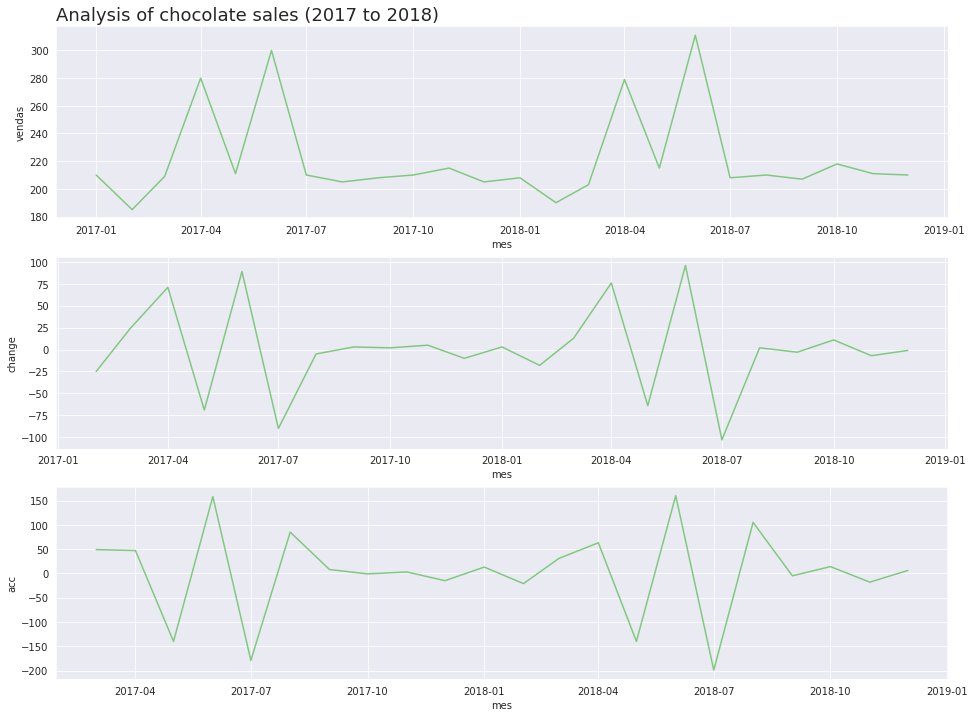

In [43]:
SetFigAccDarkGridLinePlot_Comparison('mes', ['vendas', 'change', 'acc'], choc_sales_df, 'Analysis of chocolate sales (2017 to 2018)')

Now, these graphs are much close than what we see in real companies. Note that the number of sales changes a lot in the different months. However, can we still make any inferences from these graphs?

Note that, in our two years, we have two peaks: both in april and in june. This means that our sales are very impacted by the **sazonality**: There is a steep increase in sales in specific months. Also, decomposition is important to note this aspect: we can also see sazonality on the graphs related to the change and acceleration in sales. 

## Looking more into sazonality

Now, let's look at the dataset of another store for the same Chocolate company. The sales from this store in october and november were very different from those from the other stores. Thus, let's take a look at their daily sales.

In [44]:
chocolate_daily_sales = pd.read_csv('vendas_por_dia.csv')

chocolate_daily_sales.head( )

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [45]:
chocolate_daily_sales.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   dia     61 non-null     object
 1   vendas  61 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [46]:
chocolate_daily_sales.dia = pd.to_datetime(chocolate_daily_sales.dia)
chocolate_daily_sales.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

Now, let's decompose our time series:

In [47]:
chocolate_daily_sales['change'] = chocolate_daily_sales['vendas'].diff( )

chocolate_daily_sales['acc'] = chocolate_daily_sales['change'].diff( )

chocolate_daily_sales.head( )

,dia,vendas,change,acc
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


Now, drawing our graphs:

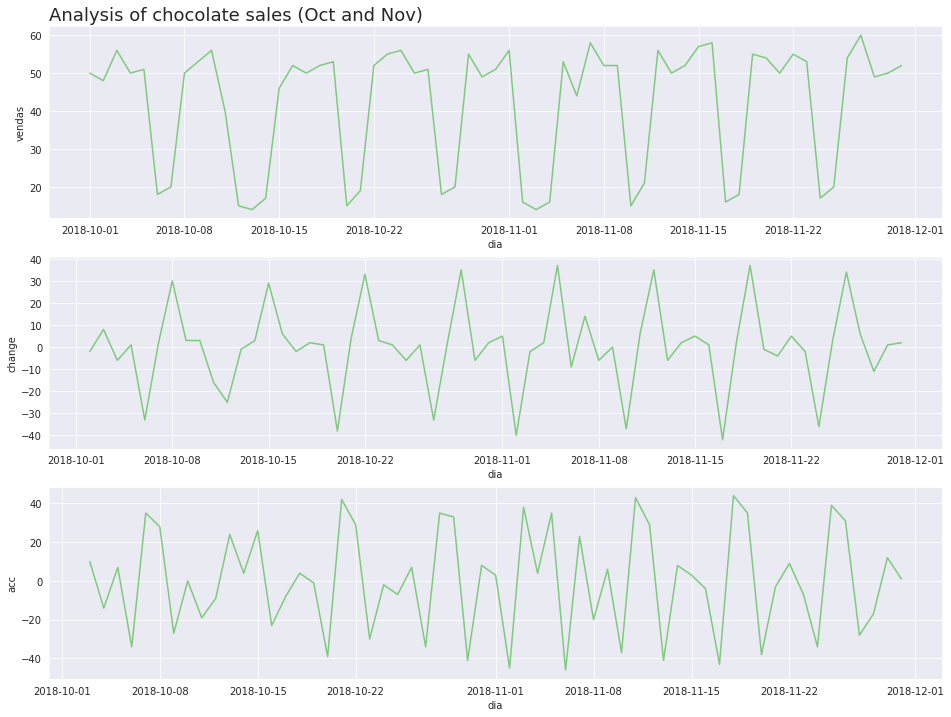

In [48]:
SetFigAccDarkGridLinePlot_Comparison('dia', ['vendas', 'change', 'acc'], chocolate_daily_sales, 'Analysis of chocolate sales (Oct and Nov)')

We can note a high sazonality aspect in this graph! This time, our sazonality seems to be related to each week.

## Understanding our sazonality

Let's create a new column to denote the day of the week. To that end, we may use the method *dt.day_name( )*

In [49]:
chocolate_daily_sales['week_day'] = chocolate_daily_sales['dia'].dt.day_name( )

chocolate_daily_sales.head(14)

,dia,vendas,change,acc,week_day
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday
7,2018-10-08,50,30.0,28.0,Monday
8,2018-10-09,53,3.0,-27.0,Tuesday
9,2018-10-10,56,3.0,0.0,Wednesday


Note that on Saturdays and Sundays, our sales are much lower! 

The sales at 2018-10-12, a Friday, also lowered. This likely happened because this is a national holiday.

Let's understand a bit more about this sazonality by grouping our data by day of the week, and then getting the mean( ) for each week day.

In [50]:
sales_by_weekday = chocolate_daily_sales.groupby('week_day')['vendas', 'change', 'acc']

sales_by_weekday.mean( ).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vendas,change,acc
week_day,,,
Friday,44.56,-6.78,-5.00
Monday,52.33,33.75,30.75
Saturday,15.88,-27.75,-19.88
Sunday,18.88,3.00,30.75
Thursday,51.33,-1.78,-3.22
Tuesday,51.67,-0.67,-34.25
Wednesday,53.11,1.44,2.11


We see that, on Saturdays and Sundays, our number of sales (vendas) did decrease very quickly. Also, on Saturdays, the change in number of sales is very low. That being said, the change in number of sales is very high on Mondays.

Thus, we can say that we have a very strong **sazonality** aspect in our sales!

# Normalization of a time series and some statistics

We have found out the sazonality and the reason for the sazonality of a chocolate store. Now, let's see if the daily sales are autocorrelated.

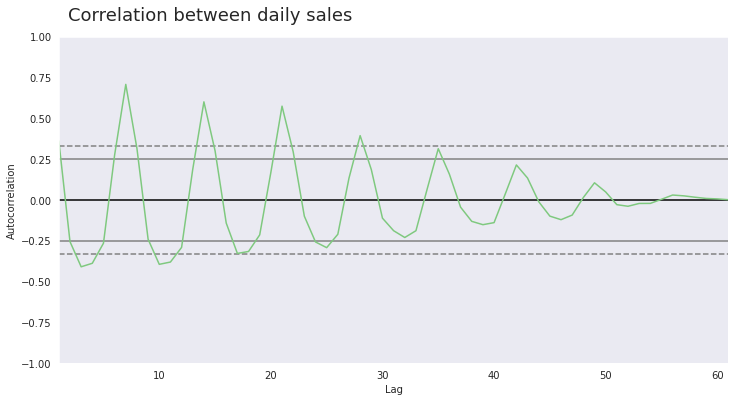

In [52]:
ax = plt.figure(figsize = (12,6))

ax.suptitle('Correlation between daily sales', fontsize = 18, x = 0.3, y = 0.95)

autocorrelation_plot(chocolate_daily_sales['vendas'])

Note that there is a high positive correlation in some areas, followed by high negative correlation. Note that this correlation reduces as the lags increase. This is also a strong evidence of a sazonality aspect.

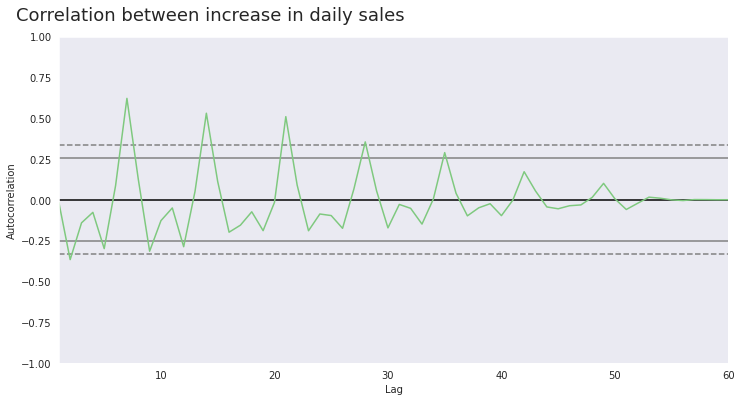

In [54]:
ax = plt.figure(figsize = (12,6))

ax.suptitle('Correlation between increase in daily sales', fontsize = 18, x = 0.3, y = 0.95)

autocorrelation_plot(chocolate_daily_sales['change'][1:])

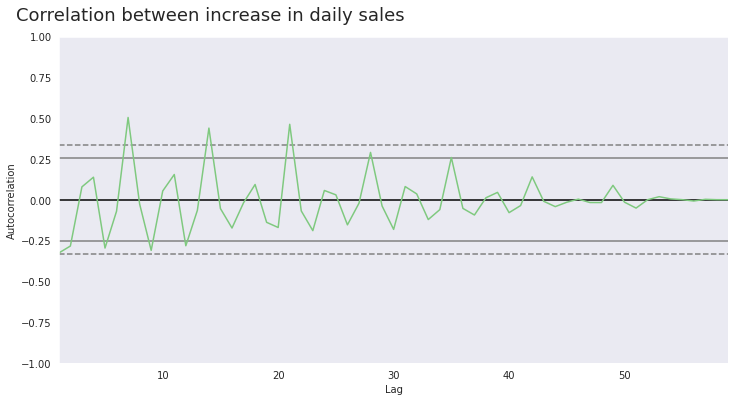

In [55]:
ax = plt.figure(figsize = (12,6))

ax.suptitle('Correlation between increase in daily sales', fontsize = 18, x = 0.3, y = 0.95)

autocorrelation_plot(chocolate_daily_sales['acc'][2:])

The same aspect also can be seen when analyzing the autocorrelation for other variables (increase in sales and acceleration). 

## Normalization

Now, we will work with the sales from another store. These are stored in file 'cafelura.csv'. Let's start by analyzing our dataset.

In [56]:
coffee_sales = pd.read_csv('cafelura.csv')

coffee_sales.head( )

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [57]:
coffee_sales.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


Our data has 24 entries, one for each month, totalizing two whole years. Also, we have no null entries. Let's change the type of our column 'mes'

In [60]:
coffee_sales.mes = pd.to_datetime(coffee_sales.mes)

coffee_sales.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

Now, let's decompose our time series. Then, we will draw our graphs for comparison.

In [61]:
coffee_sales['change'] = coffee_sales.vendas.diff( )

coffee_sales['acc'] = coffee_sales.change.diff( )

coffee_sales.head( )

,mes,vendas,change,acc
0,2017-01-31,880,NaN,NaN
1,2017-02-28,1600,720.0,NaN
2,2017-03-31,3240,1640.0,920.0
3,2017-04-30,3840,600.0,-1040.0
4,2017-05-31,5670,1830.0,1230.0


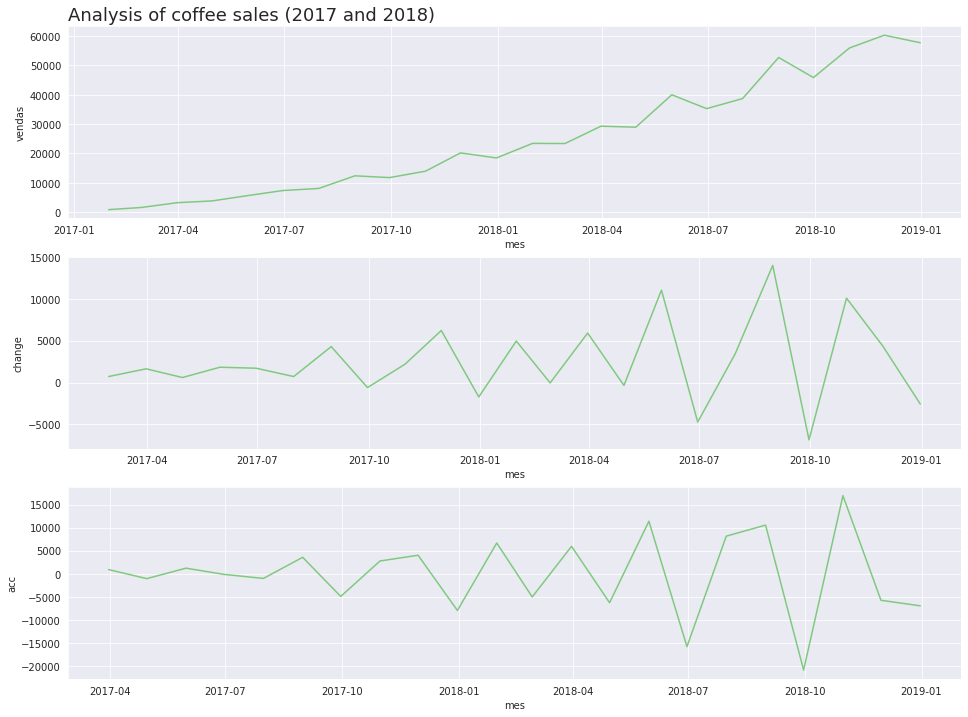

In [62]:
SetFigAccDarkGridLinePlot_Comparison('mes', ['vendas', 'change', 'acc'], coffee_sales, 'Analysis of coffee sales (2017 and 2018)')

We can see that, in general, our coffee sales **tend to increase**. That being said, in some months, our sales decreased a little bit.

It is important to note that some months are different from the others. For instance, some months have more weekends than others. Or some months have more business days than others. 

These can be used to normalize a time series, to make it easier to understand the tendency of a given variable. Here, we will normalize our time series according to the number of weekends in each month.

In [64]:
num_weekends = pd.read_csv('dias_final_de_semana.csv')
num_weekends.head( )

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


This data frame stores the number of weekend days in each month.

In [65]:
num_weekends['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

First, let's normalize the number of sales:

In [67]:
coffee_sales['sales_norm'] = coffee_sales['vendas']/num_weekends['quantidade_de_dias']

coffee_sales.head( )

,mes,vendas,change,acc,sales_norm
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0
2,2017-03-31,3240,1640.0,920.0,324.0
3,2017-04-30,3840,600.0,-1040.0,480.0
4,2017-05-31,5670,1830.0,1230.0,630.0


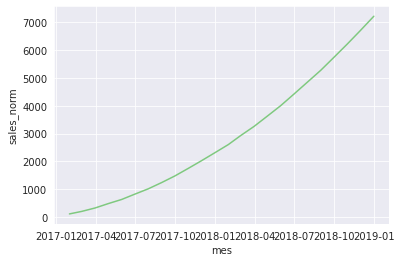

In [68]:
sns.lineplot(x = 'mes', y = 'sales_norm', data = coffee_sales)

This graph looks much more smooth! It seems like the number of weekend days greatly affects our coffee sales! Let's just compare our two sales graph:

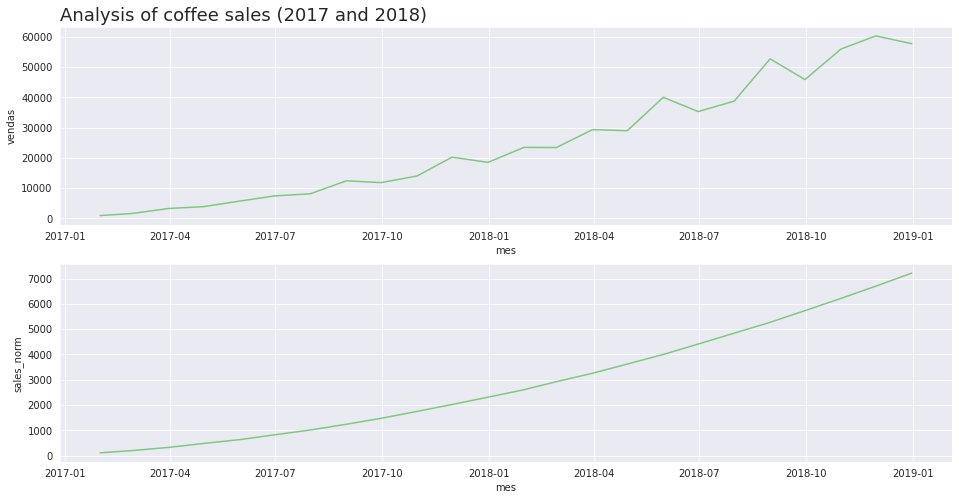

In [69]:
SetFigAccDarkGridLinePlot_Comparison('mes', ['vendas', 'sales_norm'], coffee_sales, 'Analysis of coffee sales (2017 and 2018)')

When analyzing sales, it may be very important to normalize our data. After all, it makes no sense to compare two months with very different number of business days.

## Evaluating some descriptive statistics

When working with time series, we have to understand three major components:

1.   Trend
2.   Sazonality
3.   Noise

By decomposing and visualizing our data, we can see those three aspects. However, using just our data, we can also define them using basic statistics. Let's see how we can do this.



Here, we will use the statsmodel library

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose

Then, we can use the *seasonal_decompose( )* function

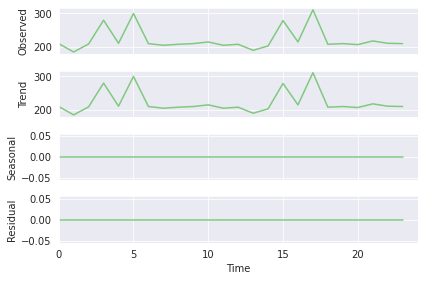

In [94]:
result = seasonal_decompose([choc_sales_df['vendas']], model = 'additive', freq = 1)

ax = result.plot( )

Note that, here, we only can see a trend. Note that we considered **freq = 1**. Frequency is a very important parameter for this analysis. Let's see how these graphs change for different frequencies.

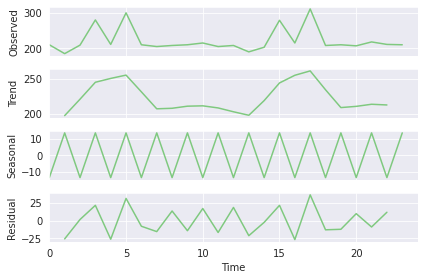

In [76]:
result = seasonal_decompose([choc_sales_df['vendas']], freq = 2)

ax = result.plot( )

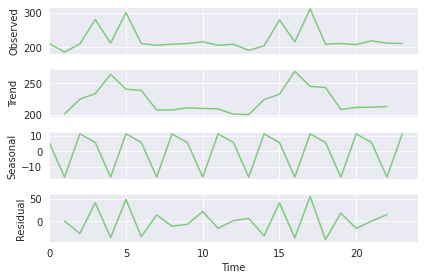

In [90]:
result = seasonal_decompose([choc_sales_df['vendas']], freq = 3)

ax = result.plot( )

Note that the frequency parameter changes the trend, seasonal and residual aspects. This parameter is related to the **seasonality frequency** we may expect from our data.

We can also get these results into a pandas DataFrame.

In [91]:
obsv = result.observed
trnd = result.trend
seas = result.seasonal
rsdl = result.resid

data = {'observed': obsv, 'trend': trnd, 'season':seas, 'residual': rsdl}

stats_res = pd.DataFrame(data)

stats_res.head( )

,observed,trend,season,residual
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


Let's finish by plotting our data once again, now from the DataFrame.

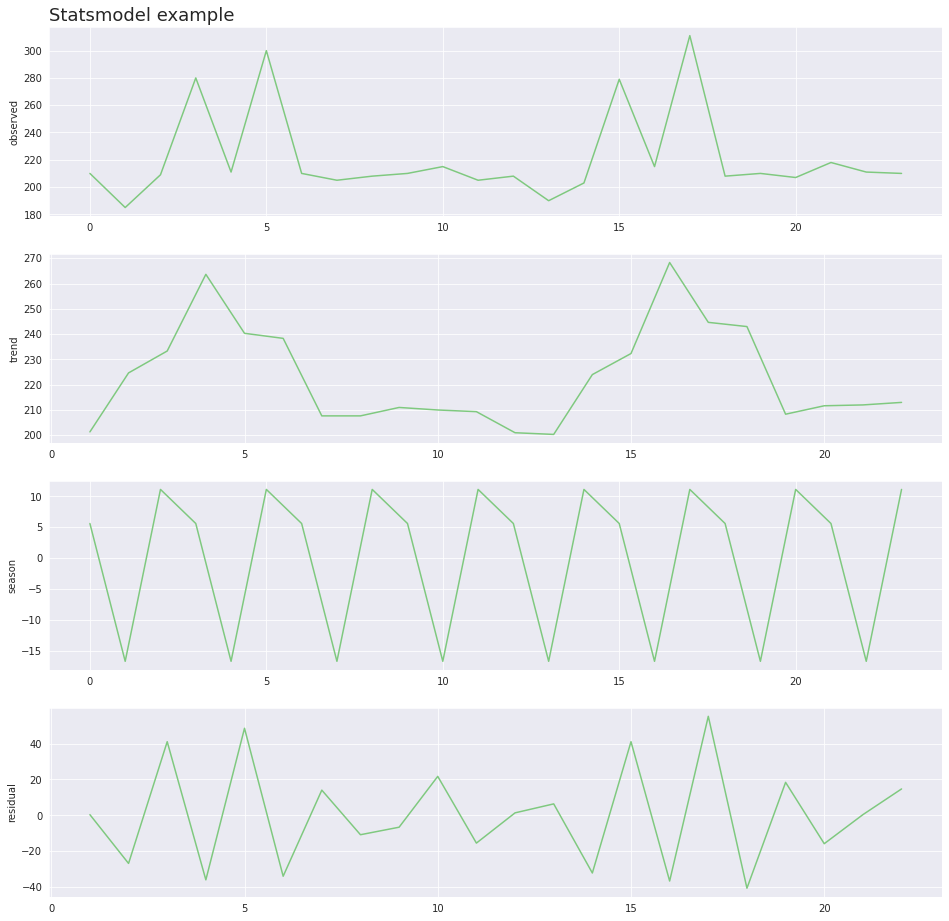

In [92]:
SetFigAccDarkGridLinePlot_Comparison(stats_res.index, ['observed', 'trend', 'season', 'residual'], stats_res, 'Statsmodel example')

### Dealing with null data

Before jumping to the next topic, it might be interesting to talk a bit about null data. If trying to decompose our data using null data, an error message will likely appear. That way, we may take some arbitrary decisions to handle these null data. Some options are:



1.   Filling the null data with the average value (using *fill_na( )*).
2.   Filling the null data with other specific value (such as 0 or 1).
3.   Dropping entries with null data (using *drop_na( )*).
4.   Filling the null data with the same value from a previous (or subsequent) observation (using *ffill( )* or *bfill( )*, respectively).
5.   Interpolating data (using *interpolate( )*).



# Noise from a time series

To talk a bit more about noise in a time series, we will work with another file:

In [95]:
cell_sales = pd.read_csv('alucel.csv')
cell_sales.head( )

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


Let's understand our data and fix its typing.

In [96]:
cell_sales.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   dia     61 non-null     object 
 1   vendas  61 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.1+ KB


In [97]:
cell_sales.dia = pd.to_datetime(cell_sales['dia'])

In [98]:
cell_sales.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

Now let's decompose our time series

In [100]:
cell_sales['change'] = cell_sales.vendas.diff( )

cell_sales['acc'] = cell_sales.change.diff( )

cell_sales.head( )

,dia,vendas,change,acc
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


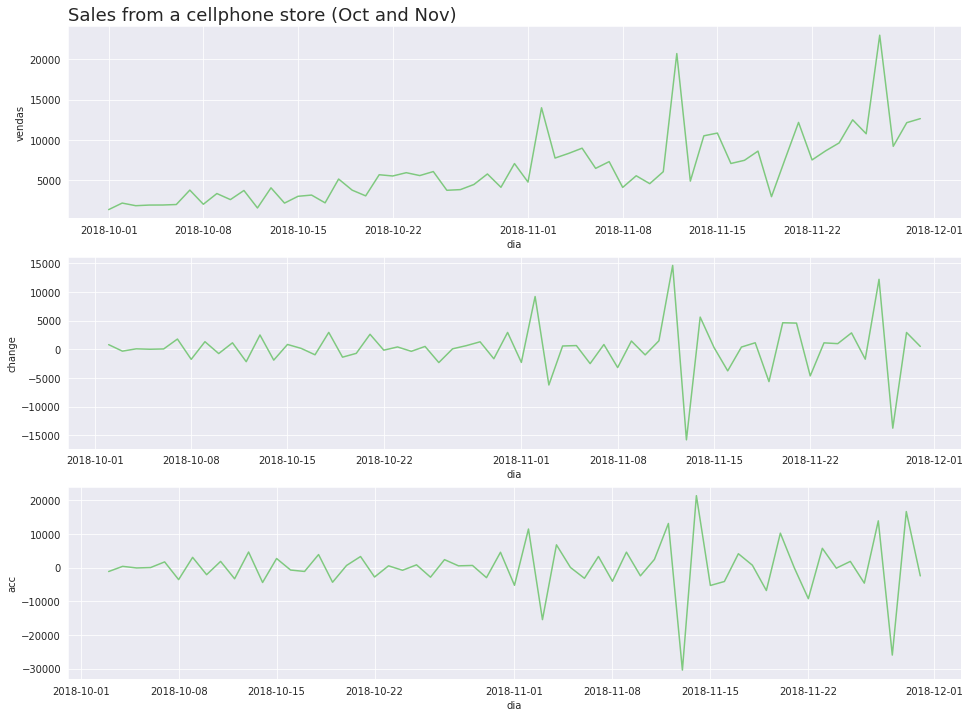

In [101]:
SetFigAccDarkGridLinePlot_Comparison('dia', ['vendas', 'change', 'acc'], cell_sales, 'Sales from a cellphone store (Oct and Nov)')

Our graph has a lot of noise. We may want to normalize our data. An important technique for normalizing our data is to use moving averages!

## Moving averages

First, let's create a new column to evaluate our moving averages. These will be evaluated for each week. Thus, we will show the moving averages for 7 days.

In [109]:
cell_sales['mov_avg'] = cell_sales['vendas'].rolling(7).mean( )
cell_sales.head(14)

,dia,vendas,change,acc,mov_avg
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429
7,2018-10-08,2039.59,-1753.48,-3540.66,2252.827143
8,2018-10-09,3365.58,1325.99,3079.47,2421.382857
9,2018-10-10,2616.12,-749.46,-2075.45,2529.348571


Now, plotting our moving averages graph

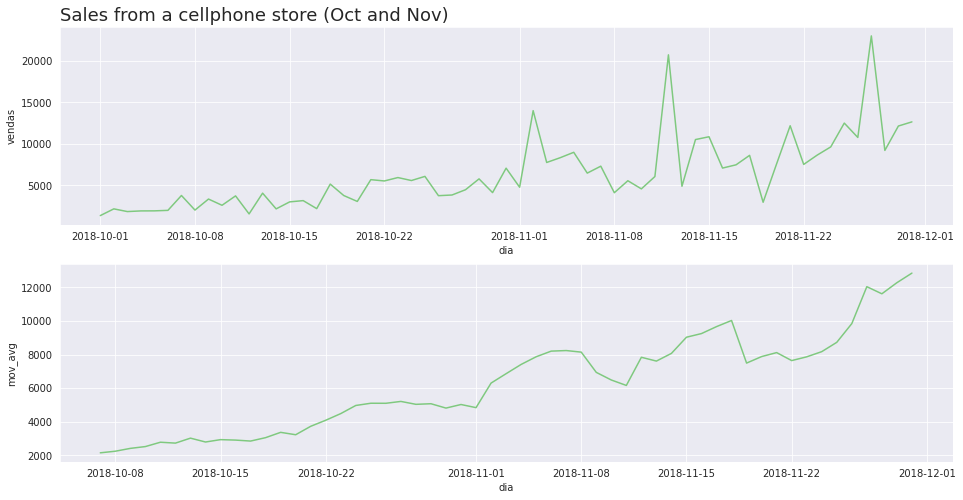

In [111]:
SetFigAccDarkGridLinePlot_Comparison('dia', ['vendas', 'mov_avg'], cell_sales, 'Sales from a cellphone store (Oct and Nov)')

This graph makes it much easier to analyze our trend! There is much less noise in this data.

Note that, as we increase the number of days used in our moving averages, we reduce even more our noise:

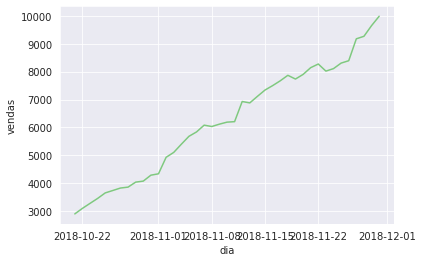

In [113]:
sns.lineplot(x = 'dia', y = cell_sales['vendas'].rolling(21).mean( ), data = cell_sales)

However, using an excessive number of days makes us lose a lot of important information.